In [1]:
import pandas as pd

NROWS = 1000

title_vec = pd.read_csv('hn_title_norm_vec.csv', nrows=NROWS)

In [2]:
origin = pd.read_csv('/Users/Shared/data/HN_posts_year_to_Sep_26_2016.csv')
origin_1 = origin[['id', 'num_points']]
data = pd.merge(title_vec, origin_1, how='inner', on=['id'])

In [3]:
origin

,id,title,url,num_points,num_comments,author,created_at
0,12579008,You have two days to comment if you want stem ...,http://www.regulations.gov/document?D=FDA-2015...,1,0,altstar,9/26/2016 3:26
1,12579005,SQLAR the SQLite Archiver,https://www.sqlite.org/sqlar/doc/trunk/README.md,1,0,blacksqr,9/26/2016 3:24
2,12578997,What if we just printed a flatscreen televisio...,https://medium.com/vanmoof/our-secrets-out-f21...,1,0,pavel_lishin,9/26/2016 3:19
3,12578989,algorithmic music,http://cacm.acm.org/magazines/2011/7/109891-al...,1,0,poindontcare,9/26/2016 3:16
4,12578979,How the Data Vault Enables the Next-Gen Data W...,https://www.talend.com/blog/2016/05/12/talend-...,1,0,markgainor1,9/26/2016 3:14
5,12578975,Saving the Hassle of Shopping,https://blog.menswr.com/2016/09/07/whats-new-w...,1,1,bdoux,9/26/2016 3:13
6,12578954,Macalifa A new open-source music app for UWP ...,http://forums.windowscentral.com/windows-phone...,1,0,thecodrr,9/26/2016 3:06
7,12578942,GitHub theweavrs/Macalifa: A music player wri...,https://github.com/theweavrs/Macalifa,1,0,thecodrr,9/26/2016 3:04
8,12578919,Google Allo first Impression,http://prodissues.com/2016/09/google-allo-firs...,3,0,jandll,9/26/2016 2:57
9,12578918,Advanced Multimedia on the Linux Command Line,https://avi.alkalay.net/2016/09/multimedia-lin...,1,0,mynameislegion,9/26/2016 2:56


In [4]:
'''
sentence_length = pd.read_csv('sentence_length.csv', header=None, )
sentence_length.rename(columns={0: 'id', 1:'length'}, inplace=True)
data = pd.merge(data, sentence_length, how='inner', on=['id'])
'''

"\nsentence_length = pd.read_csv('sentence_length.csv', header=None, )\nsentence_length.rename(columns={0: 'id', 1:'length'}, inplace=True)\ndata = pd.merge(data, sentence_length, how='inner', on=['id'])\n"

In [5]:
GOOD_THRESHOLD = 10

data['good'] = data['num_points'].apply(lambda x: 1 if x >= GOOD_THRESHOLD else 0)
data['good'].describe()

count    1000.000000
mean        0.143000
std         0.350248
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: good, dtype: float64

In [6]:
data = data.drop(['id', 'num_points'], 1)

In [7]:
train = data.sample(frac=0.8)
test = data.drop(train.index)

abnormal = data.loc[data['good'] == 1]
abnormal

,0,1,2,3,4,5,6,7,8,9,...,1191,1192,1193,1194,1195,1196,1197,1198,1199,good
37,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
61,0.100455,-0.250442,0.205256,0.294116,-0.050661,-0.076588,-0.122378,-0.219556,0.023174,0.162814,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
63,0.120978,-0.038674,0.191347,0.079504,-0.116645,-0.084728,-0.249539,-0.151900,-0.275210,0.170034,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
67,0.086143,-0.017870,-0.175223,-0.074351,0.184359,-0.060504,0.178719,-0.051344,0.068395,0.013725,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
68,0.223843,0.142300,0.007878,0.023867,0.120825,-0.002904,-0.070653,0.078359,0.022219,-0.086789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
79,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
82,0.116399,-0.195864,0.104906,0.247859,-0.085902,-0.196515,-0.335867,-0.110843,0.408223,0.107297,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
87,-0.011382,-0.063744,0.183465,0.028204,0.103851,0.000849,-0.095728,-0.250872,-0.064186,0.133073,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
88,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
91,0.131976,-0.064886,0.241725,0.064874,0.004100,-0.120741,-0.120758,-0.250728,-0.106395,0.057479,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


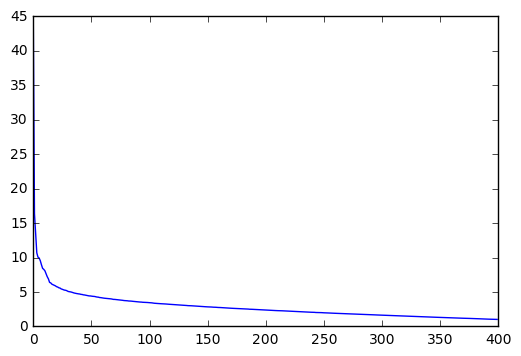

(800, 800) (800,) (800, 1200)
(1200,) (1200, 800)
(2, 1200)
(800, 1200) (2, 800)
(143, 1200) (2, 143)
(143,)
(143,)


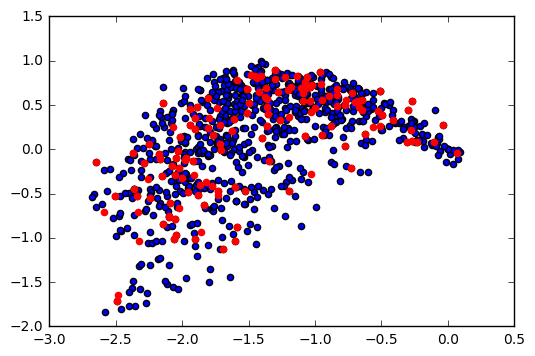

In [8]:
import numpy as np
import matplotlib.pyplot as plt

m = train[list(range(0, 1200))].as_matrix()
u, s, v = np.linalg.svd(m, full_matrices=False)
plt.plot(s[0:400])
plt.show()

print(u.shape, s.shape, v.shape)
print(m[0].shape, v.transpose().shape)

transform = np.delete(v, range(2, v.shape[0]), 0)
print(transform.shape)

def reduce(vec):
    return np.dot(vec, transform.transpose())

def to_coor(matrix):
    coor = np.apply_along_axis(reduce, 1, matrix).transpose()
    print(matrix.shape, coor.shape)
    return (coor[0], coor[1])
    
normal_x, normal_y = to_coor(m)

m2 = abnormal[list(range(0,1200))].as_matrix()

ab_x, ab_y = to_coor(m2)

print(ab_x.shape)
print(ab_y.shape)

plt.scatter(normal_x, normal_y)
plt.scatter(ab_x, ab_y, color = 'red')
plt.show()

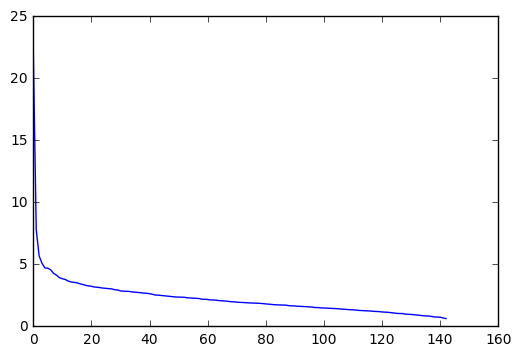

In [9]:
m2 = abnormal.as_matrix()
u, s, v = np.linalg.svd(m2)
plt.plot(s[0:400])
plt.show()

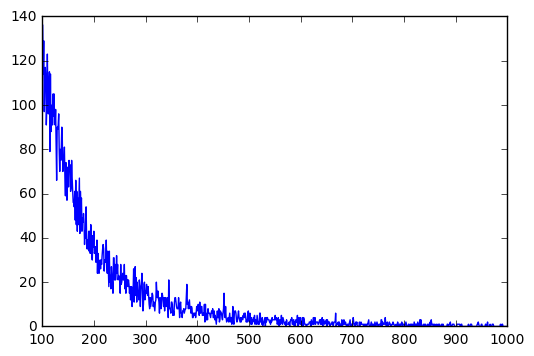

In [340]:
origin['num_points']

plot_data = origin[origin['num_points'] >= 0 ]['num_points'].values

x = np.array(list(range(100, 1001)))
y, x = np.histogram(plot_data, bins=x)
x_bin = np.delete(x, 0)

import matplotlib.pyplot as plt
plt.plot(x_bin, y)
plt.show()

(900,)
(900,)
[  3.50649345e+02   1.09380077e-02]
[[  3.29703755e+01   5.85812293e-04]
 [  5.85812293e-04   1.14259338e-08]]


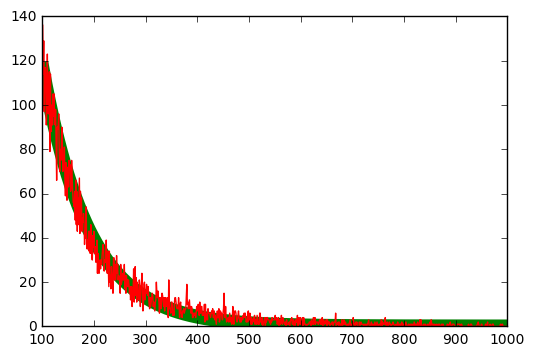

In [345]:
import numpy as np
from scipy.optimize import curve_fit
def func(x, a, b):
    return a * np.exp(-b * x)

xdata = x_bin
ydata = y

print(xdata.shape)
print(ydata.shape)

popt, pcov = curve_fit(func, xdata, ydata, p0=[0.0007, 0.0004])

print(popt)
print(pcov)
plt.plot(x_bin, func(x_bin,*popt), color='g', linewidth=10)
plt.plot(x_bin, y, color='r')
plt.show()

from scipy.stats import expon
loc, lamb = expon.fit(plot_data)

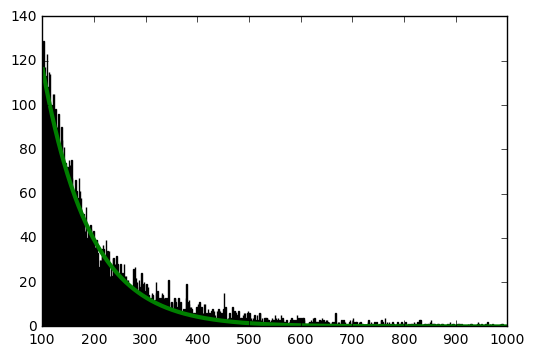

In [121]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

plt.hist(plot_data, bins=x_bin)
plt.plot(x_bin, func(x_bin,*popt), color='g', linewidth=3)
plt.show()

In [272]:
a = np.array([1,2,3,4,5])
a[(a>1) & (a<5)]=0
a

np.log(1)

0.0

(293119,)


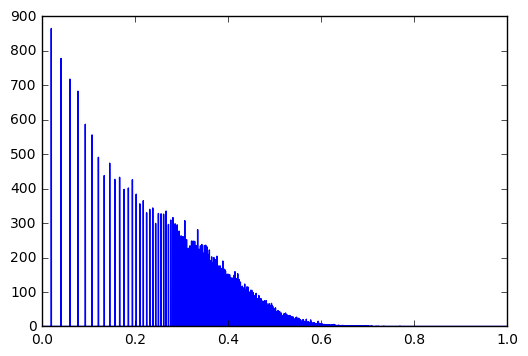

In [315]:
#Study double / triple exponential behaviour of the distribution

x = np.linspace(0.0000001, 1, 100000)

def log_tower(plot_data, k):
    for i in range(0, k):
        plot_data[plot_data < 1] = 1.
        plot_data = np.log(plot_data)
    #plot_data[plot_data < 1] = 0.
    return plot_data

ln_plot_data = log_tower(np.array(plot_data), 3)

print(ln_plot_data.shape)

y, x = np.histogram(ln_plot_data, bins=x)
x_bin = np.delete(x, 0)

import matplotlib.pyplot as plt
plt.plot(x_bin, y)
plt.show()

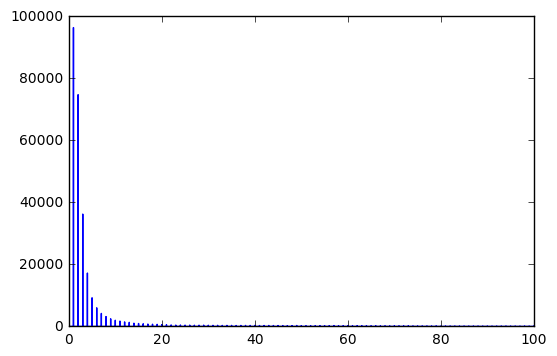

In [316]:
#Compute the elbow of exponential curve

x = np.linspace(0, 100, 10000)
y, x = np.histogram(plot_data, bins=x)
x_bin = np.delete(x, 0)

import matplotlib.pyplot as plt
plt.plot(x_bin, y)
plt.show()

(9999,)
(9997,)
(9997,)


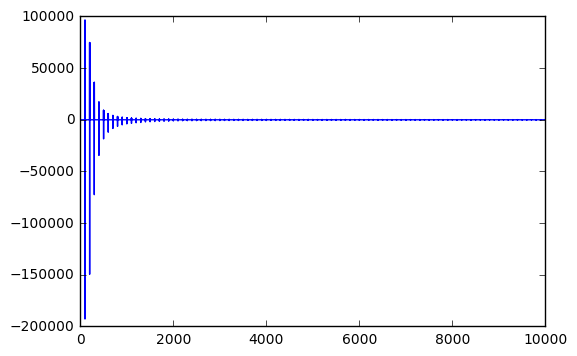

97


In [333]:
#1. Compute the derivative

def derivative(np_array):
    a = np.delete(np_array, len(np_array)-1)
    b = np.delete(np_array, 0)
    return a-b

d_y = derivative(derivative(y))
d_x_bin = np.linspace(0, len(d_y), len(d_y))

print(x_bin.shape)
print(d_y.shape)
print(d_x_bin.shape)

import matplotlib.pyplot as plt
plt.plot(d_x_bin, d_y)
plt.show()

print(np.argmax(d_y))

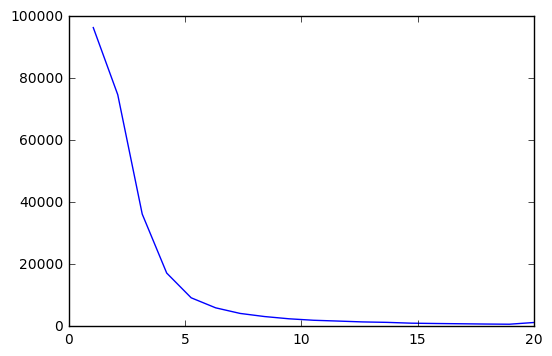

(19,)
(19,)
[  1.67818771e+05   4.74847114e-01]
[[  9.99490235e+07   2.61394110e+02]
 [  2.61394110e+02   9.35179088e-04]]


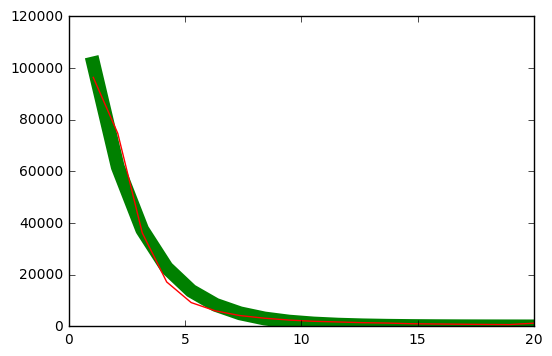

In [366]:
# Find elbow from curve estimate

origin['num_points']

plot_data = origin[origin['num_points'] >= 0 ]['num_points'].values

x = np.linspace(0, 20, 20)
y, x = np.histogram(plot_data, bins=x)
x_bin = np.delete(x, 0)

import matplotlib.pyplot as plt
plt.plot(x_bin, y)
plt.show()

import numpy as np
from scipy.optimize import curve_fit
def func(x, a, b):
    return a * np.exp(-b * x)

xdata = x_bin
ydata = y

print(xdata.shape)
print(ydata.shape)

popt, pcov = curve_fit(func, xdata, ydata, p0=[0.0007, 0.0004])

print(popt)
print(pcov)
plt.plot(x_bin, func(x_bin,*popt), color='g', linewidth=10)
plt.plot(x_bin, y, color='r')
plt.show()

167818.283946
0.489840380514


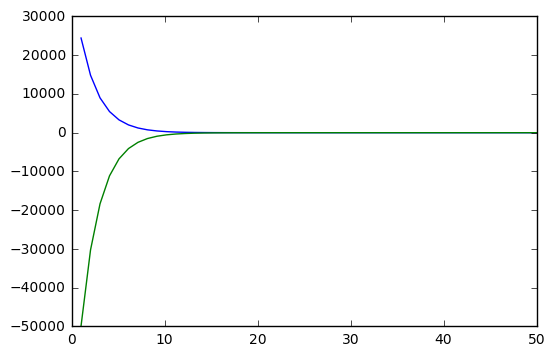

In [364]:
a, b = popt
print(a)
print(b)

# second derivative of a * e^(-bx) is ab^2e^(-bx)

def firstD(a,b,x):
    return - a * b * np.exp(-b * x)


def secondD(a,b,x):
    return a * np.square(b) * np.exp(-b * x)

plt.plot(x_bin, secondD(a,b,x_bin))
plt.plot(x_bin, firstD(a,b,x_bin))
plt.show()

from keras.layers import Input, LSTM, RepeatVector, Dense
from keras.models import Model, Sequential

input_dim = 50
timesteps = 24
latent_dim = 200

predictor = Sequential()
predictor.add(LSTM(100, input_shape=(timesteps, input_dim)))
predictor.add(Dense(100, init='normal', activation='tanh'))
predictor.add(Dense(1, init='normal', activation='sigmoid'))

'''
decoded = RepeatVector(timesteps)(encoded)
#decoded = LSTM(input_dim, return_sequences=True)(encoded)
decoded = LSTM(input_dim, return_sequences=True)(decoded)

sequence_autoencoder = Model(inputs, decoded)
encoder = Model(inputs, encoded)
'''

X = train.drop(['good'], axis=1)
Y = test.drop(['good'], axis=1)

X = X.as_matrix().reshape(train.shape[0], 24, 50)
Y = Y.as_matrix().reshape(test.shape[0], 24, 50)

predictor.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy', 'precision', 'recall', 'fmeasure'])
predictor.fit(X, train['good'], validation_data=(Y, test['good']))

sequence_autoencoder.evaluate(Y,test['good'])